In [1]:
## Set-up.
### Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '../dataset/'

In [3]:
data = pd.read_parquet(os.path.join(DATA_PATH,'data_eng.gzip'))

In [20]:
#data.to_csv('data.csv')

In [4]:
data

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,household_summary,vet_benefit,tax_status,citizenship,income_above_limit,investments
0,63+,Female,highschool,NA,Widowed,White,No,Unemployed,0,0_10,weeks_worked_48_52,Not in universe or children,NA,Householder,2,Head of household,Native,0,True
1,63+,Female,highschool,NA,Widowed,White,No,Children or Armed Forces,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Single,Native,0,False
2,18_24,Male,no_highschool,Federal government,Never married,Black,No,Children or Armed Forces,0,101_500,weeks_worked_1_25,Hospital services,Adm support including clerical,Child 18 or older,2,Single,Native,0,False
4,63+,Male,highschool,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both 65+,Native,0,False
5,33_45,Male,bachelors,Private,Married-civilian spouse present,Asian or Pacific Islander,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Retail trade,Other service,Householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209492,33_45,Female,no_highschool,NA,Married-civilian spouse present,White,Yes,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False
209493,25_32,Male,assc_voc,State government,Never married,White,No,Full-time schedules,0,0_10,weeks_worked_26_47,Public administration,Other service,Child 18 or older,2,Single,Native,0,True
209495,63+,Male,bachelors,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Joint both 65+,Native,0,True
209497,25_32,Female,somecollege,Private,Married-civilian spouse present,White,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Wholesale trade,Handlers equip cleaners etc,Spouse of householder,2,Joint both under 65,Native,0,False


In [11]:
data.astype({'vet_benefit': int, 'employment_stat': int}).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150912 entries, 0 to 209498
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    150912 non-null  object
 1   gender                 150912 non-null  object
 2   education              150912 non-null  object
 3   class                  150912 non-null  object
 4   marital_status         150912 non-null  object
 5   race                   150912 non-null  object
 6   is_hispanic            150912 non-null  object
 7   employment_commitment  150912 non-null  object
 8   employment_stat        150912 non-null  int32 
 9   wage_per_hour          150912 non-null  object
 10  working_week_per_year  150912 non-null  object
 11  industry_code_main     150912 non-null  object
 12  occupation_code_main   150912 non-null  object
 13  household_summary      150912 non-null  object
 14  vet_benefit            150912 non-null  int32 
 15  

In [35]:
cat_cols = [0,1,2,3,4,5,6,7,9,10,11,12,13,15,16,17,18]

In [15]:
from kmodes.kprototypes import KPrototypes

In [36]:
cost = []
for cluster in range(1,10):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_jobs=-1,n_init=10,verbose=1)
    kproto.fit(data, categorical=cat_cols)
    cost.append(kproto.cost_)

1\.cluster start
Best run was number 1
2\.cluster start
Best run was number 1
3\.cluster start
Best run was number 1
4\.cluster start
Best run was number 7
5\.cluster start
Best run was number 5
6\.cluster start
Best run was number 10
7\.cluster start
Best run was number 7
8\.cluster start
Best run was number 9
9\.cluster start
Best run was number 4


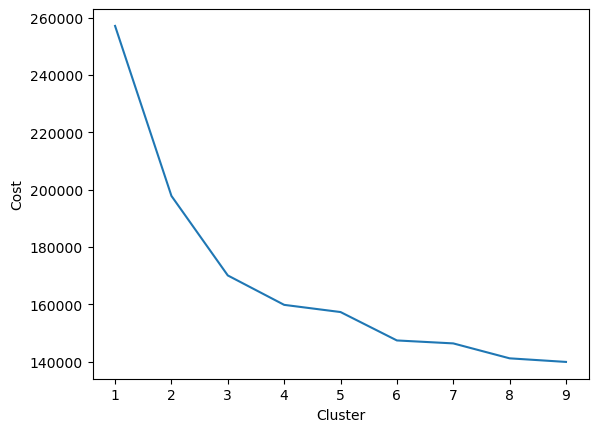

In [37]:
plt.plot(range(1,10),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [38]:
kproto = KPrototypes(n_clusters = 4, init='Huang',n_jobs=-1,n_init=10,verbose=2)
kproto.fit(data, categorical=cat_cols)

Best run was number 9


KPrototypes(gamma=0.18750014369174897, init='Huang', n_clusters=4, n_jobs=-1,
            verbose=2)

In [39]:
centroids = kproto.cluster_centroids_
labels  = kproto.labels_

In [66]:
d2 = data.copy()

In [67]:
d2['labels'] = labels
d2['cnt'] = 1

In [83]:
d2.groupby('labels')['cnt'].sum()

labels
0    43928
1    40645
2    18892
3    47447
Name: cnt, dtype: int64

In [68]:
d2.head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,industry_code_main,occupation_code_main,household_summary,vet_benefit,tax_status,citizenship,income_above_limit,investments,labels,cnt
0,63+,Female,highschool,NA,Widowed,White,No,Unemployed,0,0_10,...,Not in universe or children,NA,Householder,2,Head of household,Native,Below limit,True,3,1
1,63+,Female,highschool,NA,Widowed,White,No,Children or Armed Forces,0,0_10,...,Not in universe or children,NA,Householder,2,Single,Native,Below limit,False,3,1
2,18_24,Male,no_highschool,Federal government,Never married,Black,No,Children or Armed Forces,0,101_500,...,Hospital services,Adm support including clerical,Child 18 or older,2,Single,Native,Below limit,False,1,1
4,63+,Male,highschool,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,...,Not in universe or children,NA,Spouse of householder,2,Joint both 65+,Native,Below limit,False,3,1
5,33_45,Male,bachelors,Private,Married-civilian spouse present,Asian or Pacific Islander,No,Children or Armed Forces,0,501_1000,...,Retail trade,Other service,Householder,2,Joint both under 65,Foreign born- Not a citizen of U S,Below limit,False,1,1


In [54]:
cluster1 = d2[d2['labels']==0]
cluster2 = d2[d2['labels']==1]
cluster3 = d2[d2['labels']==2]
cluster4 = d2[d2['labels']==3]

In [75]:
pd.pivot_table(d2, values = ['cnt'], index=['race'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels                                0          1          2          3
race                                                                    
 Amer Indian Aleut or Eskimo   0.855946   0.991512   1.127461   1.039054
 Asian or Pacific Islander     3.159716   2.807233   2.117298   2.809451
 Black                         9.080769   8.734162   6.828287  10.731975
 Other                         1.593517   1.572149   1.365657   1.494299
 White                        85.310053  85.894944  88.561296  83.925222

In [77]:
pd.pivot_table(d2, values = ['cnt'], index=['education'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels                 0          1          2          3
education                                                
assc_acad       3.899563   3.026202   3.678806   1.804118
assc_voc        4.609816   4.047238   4.663350   2.316269
bachelors      15.853214  16.498954  18.563413   8.008936
doctorate       2.030596   3.166441   2.858353   0.950534
highschool     36.762429  34.503629  29.075799  31.363416
masters         5.413404   5.405339   6.050180   2.409004
no_highschool  10.553633  14.360930   9.623121  37.155142
somecollege    20.877345  18.991266  25.486979  15.992581

In [78]:
pd.pivot_table(d2, values = ['cnt'], index=['employment_commitment'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels                             0          1          2          3
employment_commitment                                                
 Children or Armed Forces  38.264888  65.862960  49.311878  48.055725
 Full-time schedules       53.448825  26.089310  39.831675   0.434169
Part-time employed          5.677472   5.247878   5.928435   0.322465
Unemployed                  2.608814   2.799852   4.928012  51.187641

In [79]:
pd.pivot_table(d2, values = ['cnt'], index=['investments'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels               0          1          2          3
investments                                            
False        80.836824  74.540534  79.345755  83.640694
True         19.163176  25.459466  20.654245  16.359306

In [80]:
pd.pivot_table(d2, values = ['cnt'], index=['wage_per_hour'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                   
labels                 0          1   2   3
wage_per_hour                              
0_10           88.483427  89.924960 NaN NaN
1000+           3.159716   4.837003 NaN NaN
101_500         2.035148   1.045639 NaN NaN
501_1000        6.308050   4.180096 NaN NaN
51-100          0.013659   0.012302 NaN NaN

## My try

In [16]:
from kmodes.kmodes import KModes

In [11]:
dt = data.drop('income_above_limit', axis=1)
dt.vet_benefit=dt.vet_benefit.astype('str')
dt.employment_stat=dt.employment_stat.astype('str')

In [21]:
cost = []
for cluster in range(1,8):
    print('{cluster}\\.cluster start'.format(cluster=cluster))
    kproto = KModes(n_clusters = cluster, init='Huang',n_jobs=-1,n_init=10,verbose=1)
    kproto.fit(dt)
    cost.append(kproto.cost_)

1\.cluster start
Best run was number 1
2\.cluster start
Best run was number 5
3\.cluster start
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 1045860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 17404, cost: 976720.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 10, iteration: 1/100, moves: 0, cost: 1045860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 22825, cost: 969528.0
Run 3, iteration: 2/100, moves: 3141, cost: 969528.0
Best run was number 7
4\.cluster start
Best run was number 5
5\.cluster start
Best run was number 3
6\.cluster start
Best run was number 1
7\.cluster start
Best run was number 7


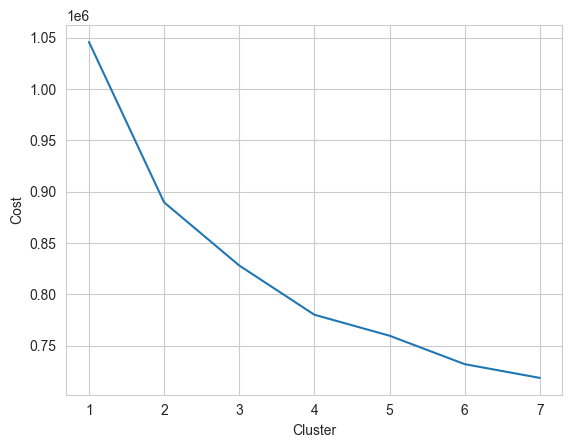

In [22]:
plt.plot(range(1,len(cost)+1),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [23]:
kproto4 = KModes(n_clusters = 4, init='Huang',n_jobs=-1,n_init=10,verbose=1)
kproto4.fit(dt)

Best run was number 7


KModes(init='Huang', n_clusters=4, n_jobs=-1, verbose=1)

In [24]:
kproto6 = KModes(n_clusters = 6, init='Huang',n_jobs=-1,n_init=10,verbose=1)
kproto6.fit(dt)

Best run was number 8


KModes(init='Huang', n_clusters=6, n_jobs=-1, verbose=1)

In [25]:
data['4_clusters']=kproto4.labels_
data['6_clusters']=kproto6.labels_

In [26]:
data.groupby('4_clusters')['income_above_limit'].mean()

4_clusters
0    0.089665
1    0.209862
2    0.016483
3    0.051587
Name: income_above_limit, dtype: float64

In [28]:
data.groupby('6_clusters')['income_above_limit'].mean()

6_clusters
0    0.172592
1    0.029028
2    0.038542
3    0.011990
4    0.088283
5    0.016187
Name: income_above_limit, dtype: float64

In [29]:
def cat_eda(data, feature, target, rotation=0):
    sns.histplot(data, x=feature)
    plt.xticks(rotation=rotation)
    sns.catplot(data=data, kind="bar", estimator='mean', x=feature, y=target, alpha=.6)
    plt.xticks(rotation=rotation)
    print(f'Categories: {data[feature].value_counts()} ')
    print(f'% NA: {np.average(data[feature].isna()) * 100} %')    

Categories: 4_clusters
2    47868
0    43997
1    32955
3    26092
Name: count, dtype: int64 
% NA: 0.0 %


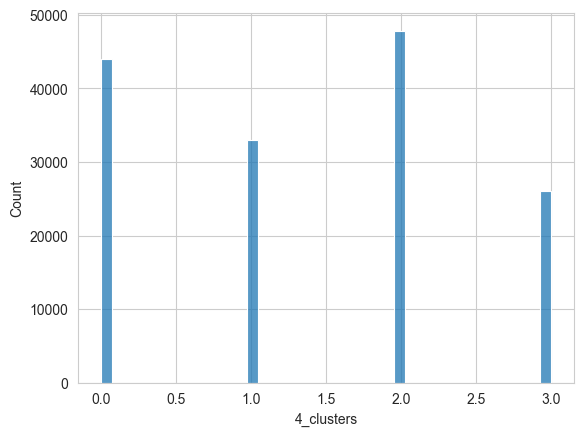

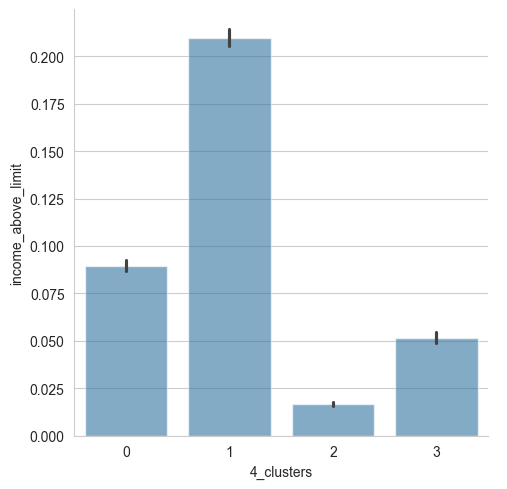

In [30]:
cat_eda(data,'4_clusters','income_above_limit')

Categories: 6_clusters
0    50825
4    25826
1    23770
2    22573
3    16180
5    11738
Name: count, dtype: int64 
% NA: 0.0 %


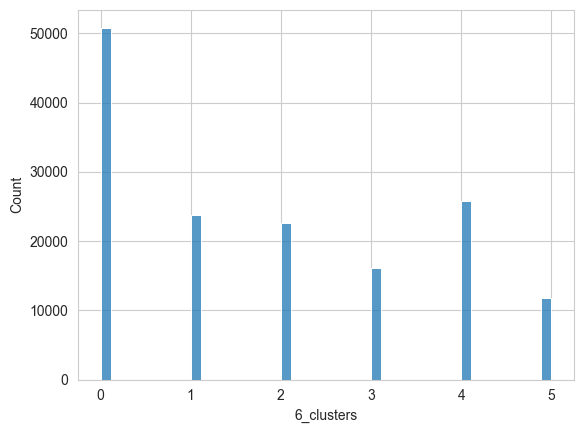

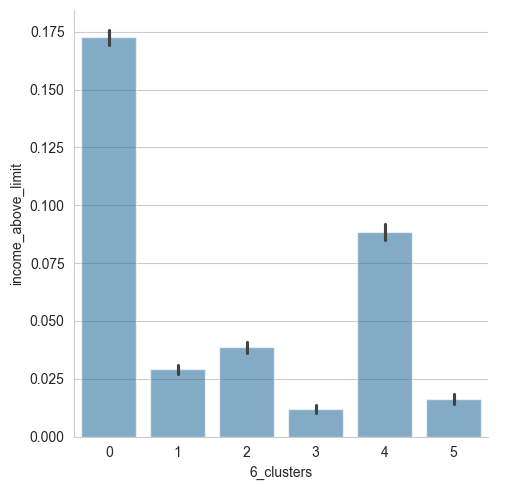

In [32]:
cat_eda(data,'6_clusters','income_above_limit')

## !!! it looks like model with 4 clusters could be of some use!!!